In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import fnmatch
import random as rn
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TEST/Batik Kawung/89.jpg
/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TEST/Batik Kawung/76.jpg
/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TEST/Batik Kawung/71.jpg
/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TEST/Batik Kawung/84.jpg
/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TEST/Batik Kawung/85.jpg
/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TEST/Batik Kawung/82.jpg
/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TEST/Batik Kawung/73.jpg
/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TEST/Batik Kawung/75.jpg
/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TEST/Batik Kawung/81.jpg
/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TEST/Batik Kawung/79.jpg
/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TEST/Batik Kawung/77.jpg
/kaggle/input/indones

#Code by MUCHAMAD RIF'AN https://www.kaggle.com/muchamadrifan/rifan-flower-batik-recognition-cnn-keras/notebook

#JARINGAN SYARAF TIRUAN 2020

#TEKNIK INFORMATIKA

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [4]:
from tqdm import notebook 
from tqdm.notebook import tqdm as tqdm
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_style('darkgrid')

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
Z=[]
IMG_SIZE=150
batik_bali_DIR='../input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TRAIN/Batik Bali'
batik_betawi_DIR='../input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TRAIN/Batik Betawi'
batik_cendrawasih_DIR='../input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TRAIN/Batik Cendrawasih'
batik_lasem_DIR='../input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TRAIN/Batik Lasem'
batik_poleng_DIR='../input/indonesian-batik-motifs-corak-app/DATASET/DATASET/TRAIN/Batik Poleng'

In [6]:
def assign_label(img,batik_type):
    return batik_type

In [7]:
X=[]
def make_train_data(batik_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img, '*.jpg'):     
            label=assign_label(img,batik_type)
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))

In [8]:
make_train_data('Batik Bali',batik_bali_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

70


In [9]:
make_train_data('Batik Betawi',batik_betawi_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

140


In [10]:
make_train_data('Batik Cendrawasih',batik_cendrawasih_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

210


In [11]:
make_train_data('Batik Lasem',batik_lasem_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

280


In [12]:
make_train_data('Batik Poleng',batik_poleng_DIR)
print(len(X))

  0%|          | 0/70 [00:00<?, ?it/s]

350


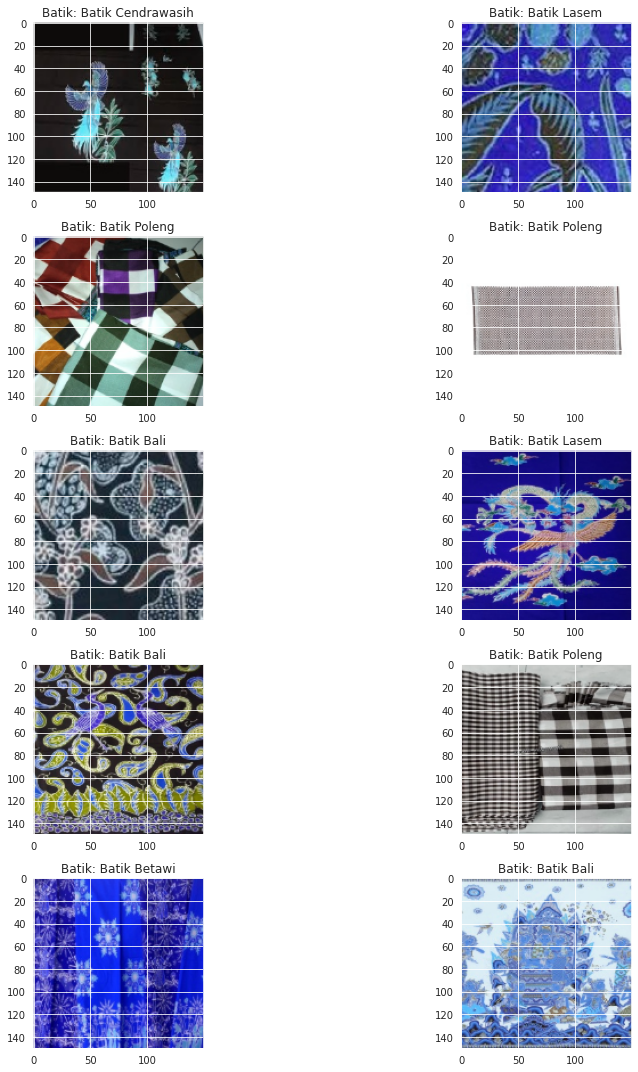

In [13]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Batik: '+Z[l])
        
plt.tight_layout()

In [14]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)  #from keras.utils import to_categorical
X=np.array(X)
X=X/255

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [16]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [17]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [18]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [20]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

#Be prepared to wait 

In [22]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 10s 5s/step - loss: 1.6571 - accuracy: 0.1771 - val_loss: 1.6445 - val_accuracy: 0.1250
Epoch 2/50
2/2 [==============================] - 5s 5s/step - loss: 1.6188 - accuracy: 0.2048 - val_loss: 1.6205 - val_accuracy: 0.1250
Epoch 3/50
2/2 [==============================] - 5s 1s/step - loss: 1.5810 - accuracy: 0.2729 - val_loss: 1.7513 - val_accuracy: 0.1818
Epoch 4/50
2/2 [==============================] - 5s 1s/step - loss: 1.6692 - accuracy: 0.2096 - val_loss: 1.6097 - val_accuracy: 0.1818
Epoch 5/50
2/2 [==============================] - 8s 4s/step - loss: 1.5822 - accuracy: 0.2552 - val_loss: 1.5847 - val_accuracy: 0.3182
Epoch 6/50
2/2 [==============================] - 8s 4s/step - loss: 1.5713 - accuracy: 0.2708 - val_loss: 1.5643 - val_accuracy: 0.2159
Epoch 7/50
2/2 [==============================] - 5s 1s/step - loss: 1.5199 - accuracy: 0.3662 - val_loss: 1.5381 - val_accuracy: 0.2727
Epoch 8/50
2/2 [========================

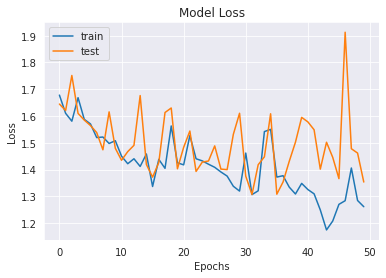

In [23]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

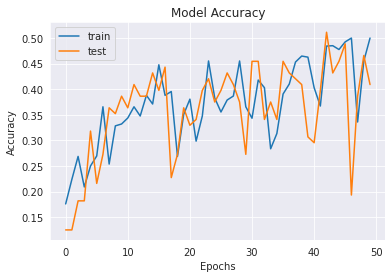

In [24]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [25]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [26]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

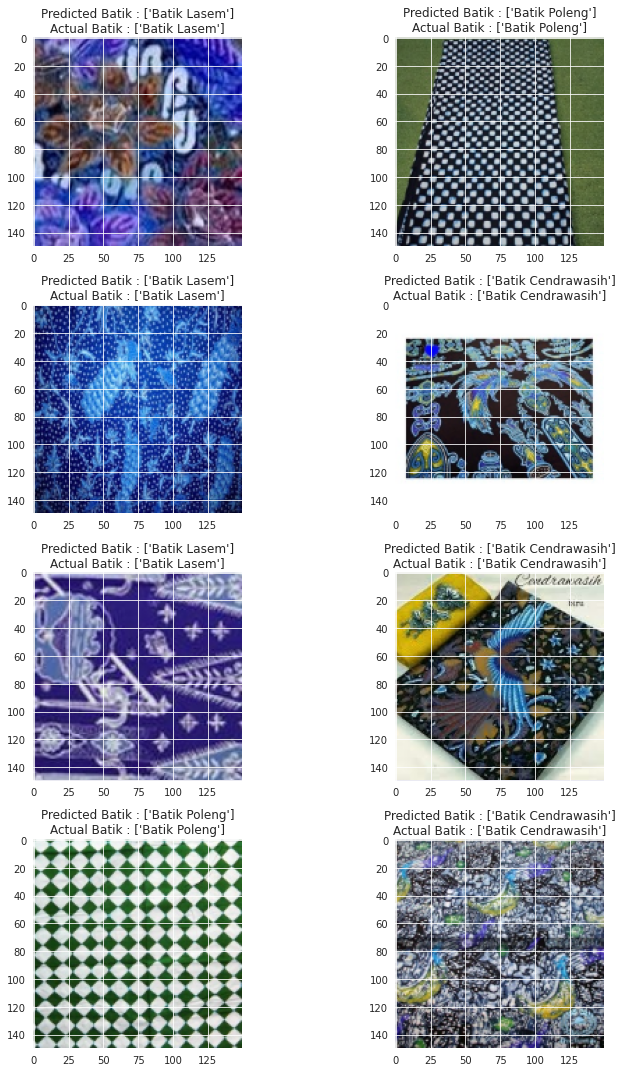

In [27]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Batik : "
                          +str(le.inverse_transform([pred_digits[prop_class[count]]]))
                          +"\n"+"Actual Batik : "
                          +str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

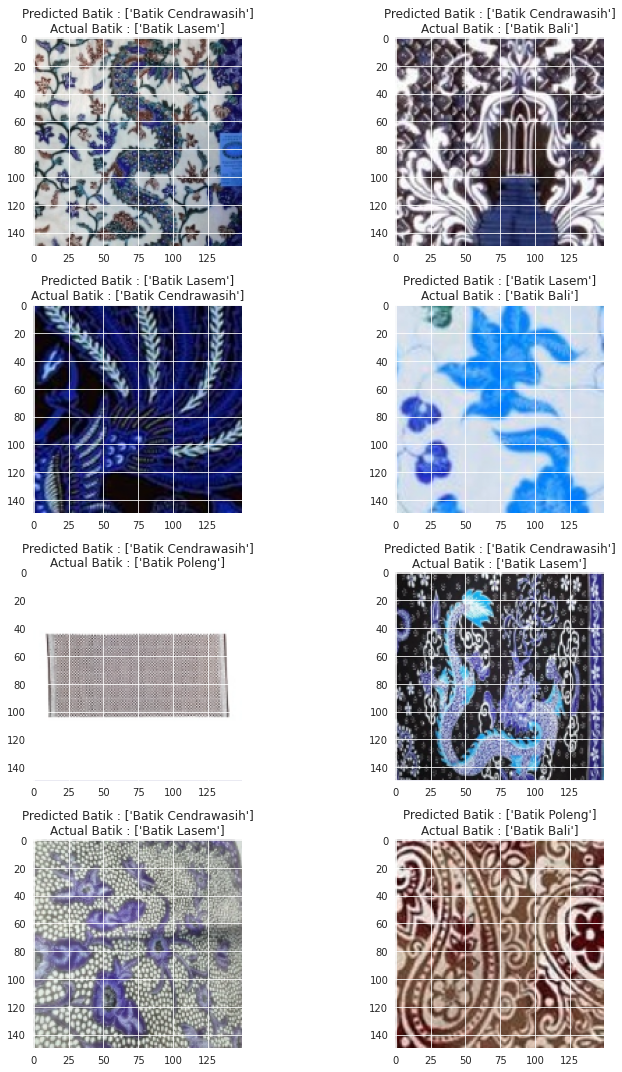

In [28]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Batik : "
                          +str(le.inverse_transform([pred_digits[mis_class[count]]]))
                          +"\n"+"Actual Batik : "
                          +str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

In [29]:
tf.saved_model.save(model, '/kaggle/working/')

In [30]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/kaggle/working/') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [31]:
#https://vittoriomazzia.com/tflite-tfrt-conversion-summary/
# save model
#tflite_model_file = pathlib.Path('/kaggle/input/indonesian-batik-motifs-corak-app/DATASET/DATASET/')
#tflite_model_file.write_bytes(tflite_model)

In [32]:
#Code by Olga Belitskaya https://www.kaggle.com/olgabelitskaya/sequential-data/comments
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#eb3434','#eb3446','Akronim','Smokum',30,15
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h1>"""%string))
    
    
dhtml('Thank you Muchamad Rifan @muchamadrifan, JARINGAN SYARAF TIRUAN, TEKNIK INFORMATIKA' )